Let us again attempt to learn the XOR function using the same MLP network,  this time starting with random initial weights and using back-propogation with simple gradient descent.

The error functions for each neuron are
\begin{eqnarray}
\Delta_1^{(2)} &=& {\partial{J} \over \partial a_1^{(2)}}\,, \\
\Delta_1^{(1)} &=&  \Delta_1^{(2)} W_{11}^{(2)}   \Theta ( z_1^{(1)} )  \\
\Delta_2^{(1)} &=&  \Delta_1^{(2)} W_{21}^{(2)}  \Theta ( z_2^{(1)} )  \,,
\end{eqnarray}
since the Heaviside step function $\Theta$ is the derivative of the ReLU activation function.

In [ ]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
np.random.seed(2)

In [277]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
print(X)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [278]:
Y = np.array([[0], [1], [1], [0]])
print(Y)

[[0]
 [1]
 [1]
 [0]]


In [0]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

Define the MLP model

In [0]:
class MLP(object):

  def __init__(self):
    # Initialise with random weights
    self.weights_1 = 0.1 * np.random.normal(size=(3,2))
    self.weights_2 = 0.1 * np.random.normal(size=(3,1))

  def forward(self, x):
    # Do a forward pass
    if len(x.shape) == 1:
      # Single example, so add a batch dimension of 1
      x = np.expand_dims(x, axis=0)
    # Hidden layer 
    z_1 = np.matmul(np.hstack((np.ones(shape=(x.shape[0], 1)), x)), self.weights_1)
    # Apply ReLU activation function
    a_1 = np.maximum(z_1, 0)
    # Output layer
    z_2 = np.matmul(np.hstack((np.ones(shape=(a_1.shape[0], 1)), a_1)), self.weights_2)
    # Linear activation 
    a_2 = sigmoid(z_2)
    return z_1, a_1, z_2, a_2

Push the true solution through the network and check it gives zero loss

In [281]:
m = MLP()
m.weights_1 = np.array([[0, -1], [1,1], [1,1]], dtype=np.float)
m.weights_2 = np.array([[0], [1], [-2]], dtype=np.float)
z_1, a_1, z_2, a_2 = m.forward(X)
print(0.25 * np.sum((a_2 - Y)**2))

0.16116474406425663


In [0]:
num_epochs = 10001
learning_rate = 0.01

Update random initial weights and biases by back-prop

In [283]:
m = MLP()
loss_history = []
weights_1_history = []
weights_2_history = []
for epoch in range(num_epochs):
  # Do forward pass
  z_1, a_1, z_2, a_2 = m.forward(X)
  #loss = 0.25 * np.sum((a_2 - Y)**2)
  loss=-np.sum((Y*np.log(a_2)+(np.ones(Y.shape)-Y)*np.log(np.ones(a_2.shape)-a_2)))
  loss_history.append(loss)
  if epoch % 100 == 0:
    print(epoch, loss)
  # Delta_2 has shape(4, 1), the first dimension being the batch dimension
  #delta_2 = 0.5 * ( a_2 - Y)
  delta_2=-(Y/a_2+(np.ones(Y.shape)-Y)/(a_2-np.ones(a_2.shape)))
  g_prime_1 = np.heaviside(z_1, 0)
  # Delta_1 has shape (4, 2)
  delta_1 = np.matmul(delta_2, m.weights_2[1:3, :].T) * g_prime_1
  # Biases of layers connecting input and hidden layers
  m.weights_1[0, :] -= learning_rate * np.sum(delta_1[:, :], axis=0)
  # Weights of layers connecting input and hidden layers 
  m.weights_1[1:3, :] -= learning_rate * np.matmul(X.T, delta_1)
  # Biases of layers connecting hidden and output layers
  m.weights_2[0, 0] -= learning_rate * np.sum(delta_2[:, :], axis=0)
  # Weights of layers connecting hidden and output layers
  m.weights_2[1:3, 0:1] -= learning_rate * np.matmul(a_1.T, delta_2)
  weights_1_history.append(np.copy(m.weights_1))
  weights_2_history.append(np.copy(m.weights_2))
loss_history = np.array(loss_history)
weights_1_history = np.array(weights_1_history)
weights_2_history = np.array(weights_2_history)

0 2.773940953225543
100 2.722399974140773
200 2.3310012219244802
300 1.9048283785878795
400 1.1995438980969595
500 nan
600 nan
700 nan
800 nan
900 nan
1000 nan
1100 nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


1200 nan
1300 nan
1400 nan
1500 nan
1600 nan
1700 nan
1800 nan
1900 nan
2000 nan
2100 nan
2200 nan
2300 nan
2400 nan
2500 nan
2600 nan
2700 nan
2800 nan
2900 nan
3000 nan
3100 nan
3200 nan
3300 nan
3400 nan
3500 nan
3600 nan
3700 nan
3800 nan
3900 nan
4000 nan
4100 nan
4200 nan
4300 nan
4400 nan
4500 nan
4600 nan
4700 nan
4800 nan
4900 nan
5000 nan
5100 nan
5200 nan
5300 nan
5400 nan
5500 nan
5600 nan
5700 nan
5800 nan
5900 nan
6000 nan
6100 nan
6200 nan
6300 nan
6400 nan
6500 nan
6600 nan
6700 nan
6800 nan
6900 nan
7000 nan
7100 nan
7200 nan
7300 nan
7400 nan
7500 nan
7600 nan
7700 nan
7800 nan
7900 nan
8000 nan
8100 nan
8200 nan
8300 nan
8400 nan
8500 nan
8600 nan
8700 nan
8800 nan
8900 nan
9000 nan
9100 nan
9200 nan
9300 nan
9400 nan
9500 nan
9600 nan
9700 nan
9800 nan
9900 nan
10000 nan


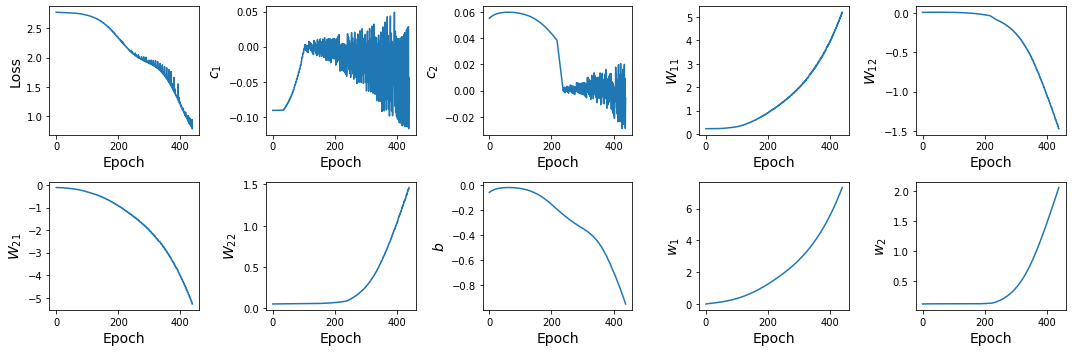

In [284]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(2, 5, 1)
ax.plot(loss_history[:])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax = plt.subplot(2, 5, 2)
ax.plot(weights_1_history[:,0,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$c_1$', fontsize=14)
ax = plt.subplot(2, 5, 3)
ax.plot(weights_1_history[:,0,1])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$c_2$', fontsize=14)
ax = plt.subplot(2, 5, 4)
ax.plot(weights_1_history[:,1,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$W_{11}$', fontsize=14)
ax = plt.subplot(2, 5, 5)
ax.plot(weights_1_history[:,1,1])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$W_{12}$', fontsize=14)
ax = plt.subplot(2, 5, 6)
ax.plot(weights_1_history[:,2,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$W_{21}$', fontsize=14)
ax = plt.subplot(2, 5, 7)
ax.plot(weights_1_history[:,2,1])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$W_{22}$', fontsize=14)
ax = plt.subplot(2, 5, 8)
ax.plot(weights_2_history[:,0,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$b$', fontsize=14)
ax = plt.subplot(2, 5, 9)
ax.plot(weights_2_history[:,1,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax = plt.subplot(2, 5, 10)
ax.plot(weights_2_history[:,2,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$w_2$', fontsize=14)
plt.tight_layout()
plt.show()

In [285]:
print(m.weights_1)

[[nan nan]
 [nan nan]
 [nan nan]]


In [286]:
print(m.weights_2)

[[nan]
 [nan]
 [nan]]


In [287]:
z_1, a_1, z_2, a_2 = m.forward(X)
print(a_2)

[[nan]
 [nan]
 [nan]
 [nan]]
